# TM: Modelo de predição setorial baseado em análise de sentimentos

## Import Libraries

In [334]:
!pip install yfinance

In [335]:
!pip install dython

In [336]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from datetime import datetime
import seaborn as sns

## Analysing Sector

A análise da variação do setor baseado nas palavras chaves será feita a partir de um portfólio composto pelas ações do setor com pesos definidos a partir do valor de mercado da empresa:
- SLCE: 4,94%
- SOJA: 1%
- AGRO: 1,7%
- GMAT: 9,58%
- PCAR: 3,38%
- CRFB: 22,13%
- ASAI: 14,06%
- NTCO: 42,71%




In [390]:
pd.set_option('display.max_rows', 10)

In [391]:
#Create a sectorial portfolio (based on market value)
#Periodo definido = aproximadamente o período das palavras chaves

assets = ['SLCE3.SA', 'SOJA3.SA', 'AGRO3.SA', 'GMAT3.SA', 'PCAR3.SA', 'CRFB3.SA', 'ASAI3.SA', 'NTCO3.SA']
weights = np.array([0.094, 0.01,0.017,0.0958,0.0388,0.2213,0.1406,0.4271])

StartDate = "2020-03-01" 
EndDate = "2021-08-22"  

df = pd.DataFrame()

for stock in assets:
  df[stock] = yf.download(stock, data_source='yahoo', start = StartDate, end = EndDate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [392]:
df

,SLCE3.SA,SOJA3.SA,AGRO3.SA,GMAT3.SA,PCAR3.SA,CRFB3.SA,ASAI3.SA,NTCO3.SA
Date,,,,,,,,
2020-03-02,19.300158,NaN,18.782623,NaN,69.074646,20.445248,NaN,44.806503
2020-03-03,19.081251,NaN,19.073078,NaN,69.917816,20.825623,NaN,44.496529
2020-03-04,20.075447,NaN,19.750799,NaN,69.796021,21.205999,NaN,44.166553
2020-03-05,20.029840,NaN,19.334484,NaN,66.601326,20.236038,NaN,41.246780
2020-03-06,19.382246,NaN,18.375990,NaN,64.933723,20.274076,NaN,39.796894
...,...,...,...,...,...,...,...,...
2021-08-16,42.799999,14.18,26.049999,6.98,30.580000,18.559999,17.250000,53.560001
2021-08-17,41.580002,13.81,25.580000,7.03,29.549999,18.110001,16.959999,52.599998
2021-08-18,41.720001,14.53,25.610001,7.00,29.000000,18.100000,16.660000,52.330002


In [393]:
#Calculate daily and cummulative returns
returns = df.pct_change()
cumreturns = (returns+1).cumprod()

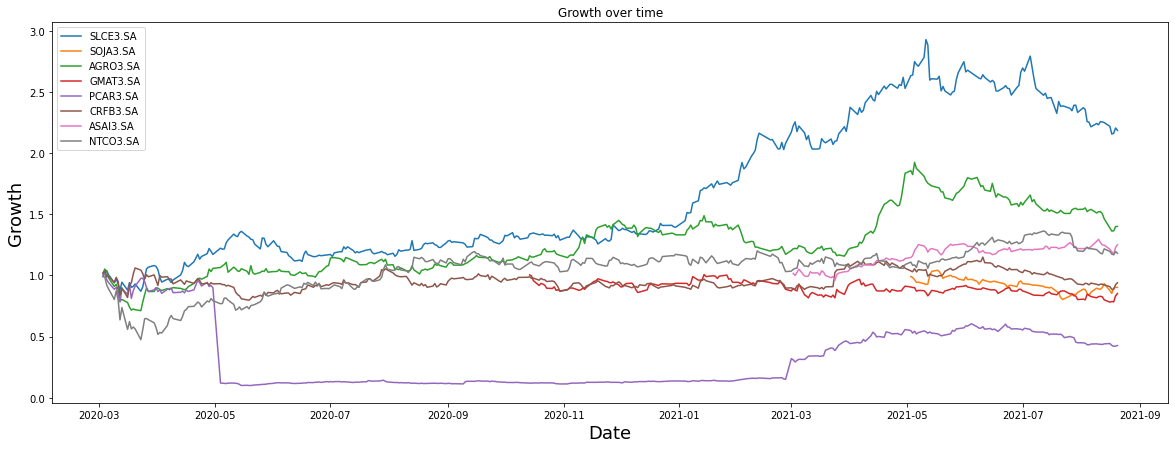

In [394]:
#Retorno das ações pelo tempo
plt.figure(figsize=(20,7))

for a in cumreturns.columns.values:
  plt.plot(cumreturns[a], label = a)
 
plt.title("Growth over time")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Growth', fontsize = 18)
plt.legend(df.columns.values, loc="upper left")
plt.show()
 

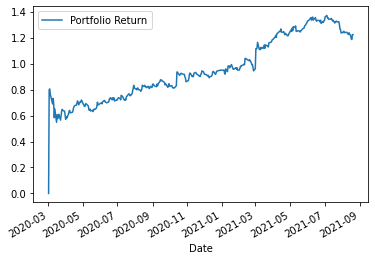

In [395]:
#Portfolio Cummulative Return
portCumReturn = cumreturns
portCumReturn["Portfolio Return"] = (cumreturns*weights).sum(axis=1)
portCumReturn["Date"] = portCumReturn.index
portCumReturn.plot(x="Date", y="Portfolio Return", kind="line")
 


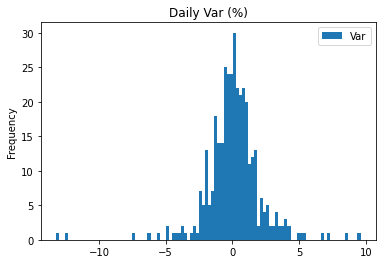

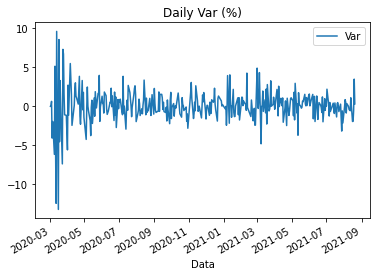

In [396]:
#Portfolio Daily Returns
portreturns = pd.DataFrame()

portreturns["Var"] = (returns*weights).sum(axis=1)*100
portreturns["Data"] = portreturns.index

portreturns.plot(x="Data", y="Var", kind = 'hist', bins = 100, title = "Daily Var (%)")
portreturns.plot(x="Data", y="Var", kind = 'line', title = "Daily Var (%)")


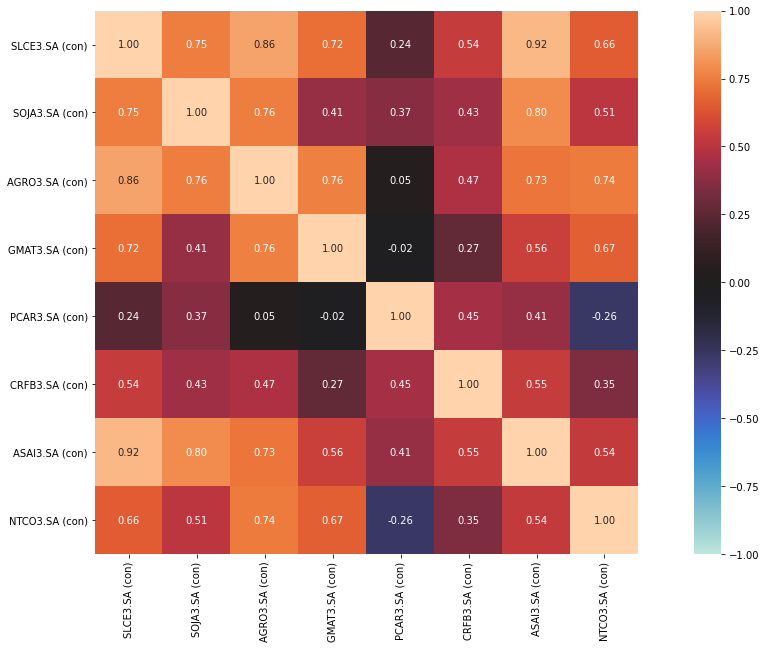

In [397]:
#Correlation Matrix

from dython import nominal
nominal.associations(df, figsize=(20,10),mark_columns=True);


## Creating the DF under analysis (predict) + Data tratement 



Agora que a variável dependente do modelo foi definido (portreturns --> retorno diário do portfólio), vamos tratar as variáveis independetes (palavras-chave)


Tentei achar palavras chaves que se relacionem com meus subsetores (agropecuária, comércio e distribuição, e produtos de uso pessoal e limpeza)


In [409]:
#DF for each sentiment
commo =pd.read_csv("/content/sentiments/commodities.csv", sep = ";")
empr =pd.read_csv("/content/sentiments/geracao de emprego.csv", sep = ";")
ibov =pd.read_csv("/content/sentiments/ibovespa.csv", sep = ";")
pandemia =pd.read_csv("/content/sentiments/pandemia.csv", sep = ";")
pib =pd.read_csv("/content/sentiments/commodities.csv", sep = ";")
varejo =pd.read_csv("/content/sentiments/varejo.csv", sep = ";")
agua =pd.read_csv("/content/sentiments/agua.csv", sep = ";")
china = pd.read_csv("/content/sentiments/china.csv", sep = ";")
credito = pd.read_csv("/content/sentiments/credito.csv", sep = ";")
eua = pd.read_csv("/content/sentiments/eua.csv", sep = ";")
export = pd.read_csv("/content/sentiments/exportacao.csv", sep = ";")
vendas = pd.read_csv("/content/sentiments/vendas no varejo.csv", sep = ";")

In [410]:
#Usar DFs com o maior número de dados
dfs = [commo, empr, ibov, pandemia, pib, varejo, agua, china, credito, eua, export, vendas]
x=1

for elements in dfs:
  print("the len of " +  str(x) +" df is:  " + str((len(elements))))
  x = x+1

#DFs satisfatórios: agua china credito eua

the len of 1 df is:  146
the len of 2 df is:  245
the len of 3 df is:  133
the len of 4 df is:  531
the len of 5 df is:  146
the len of 6 df is:  108
the len of 7 df is:  927
the len of 8 df is:  781
the len of 9 df is:  932
the len of 10 df is:  921
the len of 11 df is:  236
the len of 12 df is:  3


In [411]:
china['Data'] = pd.to_datetime(china['Data'], format='%d/%m/%Y')
pandemia["Data"] =pd.to_datetime(pandemia["Data"], format='%d/%m/%Y')
credito["Data"] =pd.to_datetime(credito["Data"], format='%d/%m/%Y')
eua["Data"] =pd.to_datetime(eua["Data"], format='%d/%m/%Y')
agua["Data"] =pd.to_datetime(agua["Data"], format='%d/%m/%Y')

In [412]:
#Criando base de dados
predict = pd.merge(portreturns, china, on = 'Data', how = 'left')
predict = pd.merge(predict, pandemia, on ='Data', how ='left')
predict = pd.merge(predict, credito, on ='Data', how ='left')

predict.columns

# x = China, y= pandemia, null = credito

Index(['Var', 'Data', 'Medo_x', 'Alegria_x', 'Tristeza_x', 'Confianca_x',
       'Raiva_x', 'Antecipacao_x', 'Desgosto_x', 'Surpresa_x', 'Polaridade_x',
       'Medo_y', 'Alegria_y', 'Tristeza_y', 'Confianca_y', 'Raiva_y',
       'Antecipacao_y', 'Desgosto_y', 'Surpresa_y', 'Polaridade_y', 'Medo',
       'Alegria', 'Tristeza', 'Confianca', 'Raiva', 'Antecipacao', 'Desgosto',
       'Surpresa', 'Polaridade'],
      dtype='object')

In [413]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Var            365 non-null    float64       
 1   Data           365 non-null    datetime64[ns]
 2   Medo_x         355 non-null    object        
 3   Alegria_x      355 non-null    object        
 4   Tristeza_x     355 non-null    object        
 5   Confianca_x    355 non-null    object        
 6   Raiva_x        355 non-null    object        
 7   Antecipacao_x  355 non-null    object        
 8   Desgosto_x     355 non-null    object        
 9   Surpresa_x     355 non-null    object        
 10  Polaridade_x   355 non-null    object        
 11  Medo_y         354 non-null    float64       
 12  Alegria_y      354 non-null    float64       
 13  Tristeza_y     354 non-null    float64       
 14  Confianca_y    354 non-null    float64       
 15  Raiva_y        354 non-

In [414]:
#Transformar dtype object em float
predict_nodate = predict.drop(columns="Data")
predict_nodate = predict_nodate.astype('float64')
predict_nodate["Data"] = predict["Data"]
predict = predict_nodate
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Var            365 non-null    float64       
 1   Medo_x         351 non-null    float64       
 2   Alegria_x      351 non-null    float64       
 3   Tristeza_x     351 non-null    float64       
 4   Confianca_x    351 non-null    float64       
 5   Raiva_x        351 non-null    float64       
 6   Antecipacao_x  351 non-null    float64       
 7   Desgosto_x     351 non-null    float64       
 8   Surpresa_x     351 non-null    float64       
 9   Polaridade_x   350 non-null    float64       
 10  Medo_y         354 non-null    float64       
 11  Alegria_y      354 non-null    float64       
 12  Tristeza_y     354 non-null    float64       
 13  Confianca_y    354 non-null    float64       
 14  Raiva_y        354 non-null    float64       
 15  Antecipacao_y  354 non-

In [415]:
predict.isnull().sum()

Var             0
Medo_x         14
Alegria_x      14
Tristeza_x     14
Confianca_x    14
               ..
Antecipacao     7
Desgosto        7
Surpresa        7
Polaridade      7
Data            0
Length: 29, dtype: int64

In [416]:
#Retirar valores nulos
predict = predict.dropna()
predict.isnull().sum()

Var            0
Medo_x         0
Alegria_x      0
Tristeza_x     0
Confianca_x    0
              ..
Antecipacao    0
Desgosto       0
Surpresa       0
Polaridade     0
Data           0
Length: 29, dtype: int64

In [417]:
#Reitar valores = 0
predict= predict[predict['Var'] != 0]


predict= predict[predict['Medo_x'] != 0]
predict= predict[predict['Alegria_x'] != 0]
predict= predict[predict['Tristeza_x'] != 0]
predict= predict[predict['Confianca_x'] != 0]
predict= predict[predict['Raiva_x'] != 0]
predict= predict[predict['Antecipacao_x'] != 0]
predict= predict[predict['Desgosto_x'] != 0]
predict= predict[predict['Surpresa_x'] != 0]


predict= predict[predict['Medo_y'] != 0]
predict= predict[predict['Alegria_y'] != 0]
predict= predict[predict['Tristeza_y'] != 0]
predict= predict[predict['Confianca_y'] != 0]
predict= predict[predict['Raiva_y'] != 0]
predict= predict[predict['Antecipacao_y'] != 0]
predict= predict[predict['Desgosto_y'] != 0]
predict= predict[predict['Surpresa_y'] != 0]

predict= predict[predict['Medo'] != 0]
predict= predict[predict['Alegria'] != 0]
predict= predict[predict['Tristeza'] != 0]
predict= predict[predict['Confianca'] != 0]
predict= predict[predict['Raiva'] != 0]
predict= predict[predict['Antecipacao'] != 0]
predict= predict[predict['Desgosto'] != 0]
predict= predict[predict['Surpresa'] != 0]


In [418]:
len(predict)

191

In [419]:
predict= predict.drop(columns=["Data"])

In [420]:
predict

,Var,Medo_x,Alegria_x,Tristeza_x,Confianca_x,Raiva_x,Antecipacao_x,Desgosto_x,Surpresa_x,Polaridade_x,Medo_y,Alegria_y,Tristeza_y,Confianca_y,Raiva_y,Antecipacao_y,Desgosto_y,Surpresa_y,Polaridade_y,Medo,Alegria,Tristeza,Confianca,Raiva,Antecipacao,Desgosto,Surpresa,Polaridade
11,8.548148,0.224000,0.048000,0.272000,0.128000,0.136000,0.048000,0.104000,0.040000,59.523810,0.303170,0.034597,0.281872,0.074493,0.111689,0.074493,0.085091,0.034597,51.339672,0.196080,0.039196,0.137286,0.137286,0.156884,0.078392,0.078392,0.176482,53.853697
12,-4.535029,0.187481,0.046895,0.218778,0.093791,0.179682,0.070293,0.117188,0.085891,57.148080,0.337200,0.014700,0.299500,0.088400,0.096600,0.068700,0.063800,0.031100,52.433090,0.223500,0.047100,0.141200,0.188200,0.105900,0.070600,0.129400,0.094100,54.900000
13,3.297467,0.177400,0.031100,0.172800,0.168100,0.173500,0.060700,0.151000,0.065400,62.049509,0.290400,0.023700,0.252300,0.097200,0.134000,0.056500,0.099900,0.046000,52.667269,0.172100,0.041000,0.180300,0.098400,0.196700,0.065600,0.155700,0.090200,56.669378
14,0.232919,0.198620,0.038904,0.195820,0.169417,0.156916,0.055606,0.126413,0.058306,60.593994,0.291558,0.029306,0.285057,0.141728,0.087918,0.052110,0.076515,0.035807,57.083612,0.151300,0.100800,0.159700,0.176500,0.109200,0.092400,0.134500,0.075600,57.147714
15,-7.377361,0.183900,0.035900,0.210800,0.130000,0.170400,0.080700,0.103100,0.085200,60.792009,0.273773,0.049895,0.263374,0.120388,0.100690,0.064894,0.073393,0.053595,54.247350,0.156269,0.072885,0.187463,0.166667,0.156269,0.093781,0.114577,0.052090,60.713062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.860492,0.140514,0.046805,0.168017,0.154315,0.168017,0.101910,0.157016,0.063406,63.245683,0.284428,0.024102,0.268327,0.094409,0.145915,0.049405,0.089009,0.044404,54.037545,0.113800,0.083800,0.188000,0.166500,0.173700,0.101800,0.075400,0.097000,64.209382
354,0.341363,0.175800,0.048500,0.200000,0.145500,0.203000,0.078800,0.084800,0.063600,60.635311,0.280628,0.033203,0.281828,0.103810,0.111611,0.059106,0.083308,0.046505,55.132971,0.158084,0.065293,0.170083,0.171783,0.140886,0.118588,0.091091,0.084192,60.481160
355,-0.015579,0.213579,0.086991,0.128487,0.120988,0.196580,0.107789,0.047295,0.098290,45.355390,0.274100,0.041500,0.268700,0.098000,0.127900,0.061200,0.082300,0.046300,53.744687,0.169300,0.060700,0.223600,0.153400,0.127800,0.083100,0.115000,0.067100,62.108731
356,-0.421063,0.193881,0.065293,0.159284,0.163084,0.136286,0.084492,0.138186,0.059494,55.433287,0.248400,0.045900,0.246200,0.115300,0.135200,0.065800,0.093300,0.049900,55.123513,0.150400,0.079700,0.175900,0.126300,0.154900,0.102300,0.112800,0.097700,56.772497


## Data Base Analysis



In [358]:
predict.describe()

,Var,Medo_x,Alegria_x,Tristeza_x,Confianca_x,Raiva_x,Antecipacao_x,Desgosto_x,Surpresa_x,Polaridade_x,Medo_y,Alegria_y,Tristeza_y,Confianca_y,Raiva_y,Antecipacao_y,Desgosto_y,Surpresa_y,Polaridade_y,Medo,Alegria,Tristeza,Confianca,Raiva,Antecipacao,Desgosto,Surpresa,Polaridade
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,0.178290,0.190650,0.049619,0.184253,0.143085,0.155706,0.075327,0.134179,0.067183,57.615442,0.282763,0.035296,0.266227,0.113877,0.116790,0.051640,0.087076,0.046333,54.425912,0.180323,0.062783,0.182029,0.162121,0.140956,0.083241,0.115445,0.073101,58.474744
std,1.894921,0.037401,0.028154,0.042550,0.044384,0.036581,0.032231,0.038633,0.024192,6.025482,0.021755,0.018866,0.023033,0.025165,0.021078,0.014126,0.020358,0.012757,2.085176,0.035438,0.023485,0.035743,0.054657,0.033750,0.025533,0.030244,0.022431,5.219854
min,-7.377361,0.040000,0.015197,0.040000,0.038496,0.069000,0.009799,0.030303,0.021298,26.672444,0.168683,0.001000,0.157084,0.043100,0.016902,0.005099,0.033903,0.004499,46.341154,0.040000,0.013001,0.043491,0.020402,0.048795,0.022200,0.043496,0.013699,39.285013
25%,-0.733280,0.171259,0.032798,0.164242,0.117350,0.135743,0.055095,0.109600,0.051647,55.173032,0.273973,0.026399,0.256388,0.100690,0.108505,0.045002,0.077154,0.038704,53.380728,0.160642,0.047600,0.167108,0.132943,0.125000,0.068447,0.095295,0.060350,56.262817
50%,0.108752,0.191919,0.043500,0.187700,0.139514,0.155000,0.066700,0.137186,0.065093,58.343035,0.284100,0.032797,0.268073,0.110322,0.116788,0.051100,0.085591,0.046300,54.247350,0.181818,0.060700,0.183200,0.158616,0.141386,0.081400,0.113789,0.071500,58.800477
75%,1.014281,0.207560,0.058856,0.211311,0.168700,0.173291,0.090409,0.154200,0.078804,60.830437,0.293465,0.038402,0.278750,0.124212,0.128350,0.057697,0.095560,0.051853,55.534702,0.199150,0.076546,0.198360,0.182059,0.157658,0.095360,0.129500,0.084242,61.359842
max,8.548148,0.384562,0.263174,0.352935,0.304470,0.333267,0.260848,0.241400,0.201580,75.008750,0.343266,0.192300,0.333267,0.245051,0.174617,0.130887,0.204100,0.101710,60.204862,0.326533,0.153200,0.306131,0.465753,0.300000,0.181818,0.230800,0.176482,78.571429


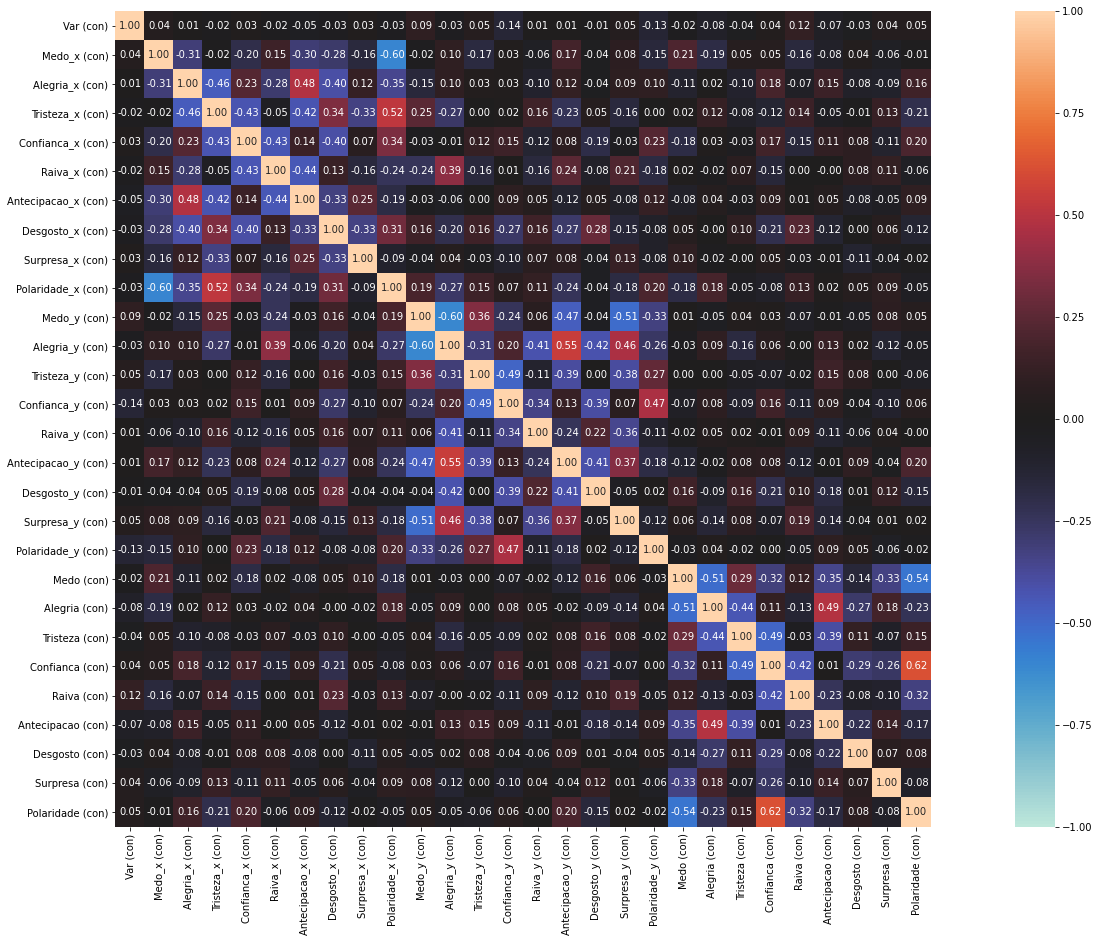

In [359]:
nominal.associations(predict, figsize=(30,15),mark_columns=True);

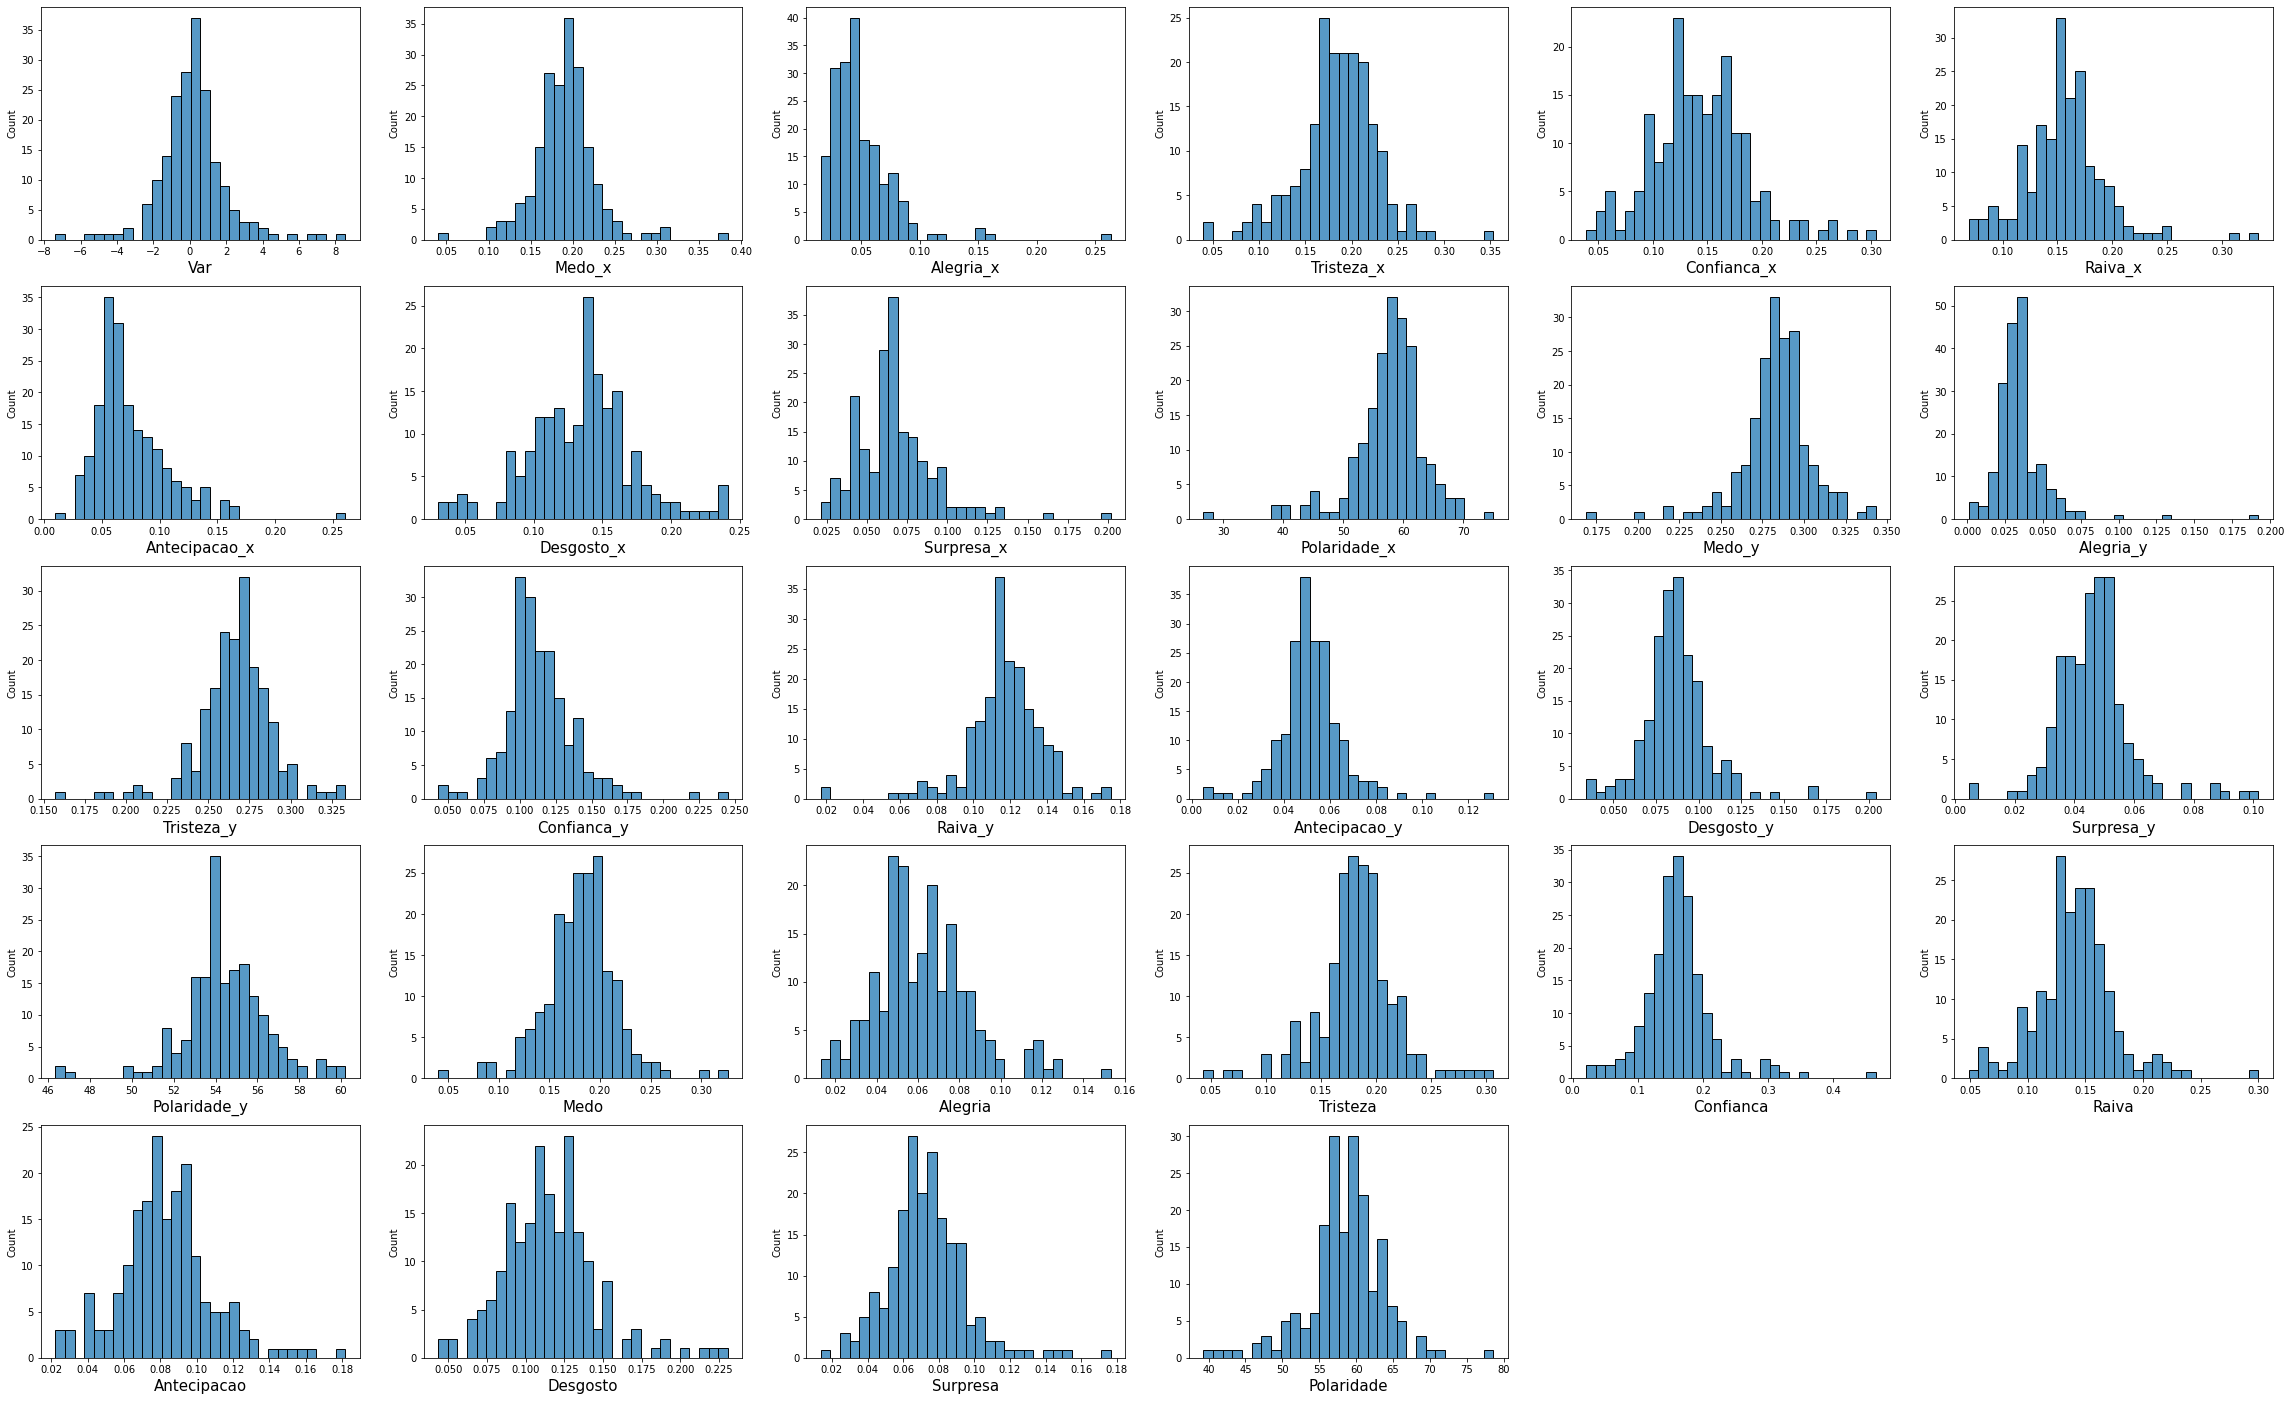

In [360]:
plt.figure(figsize=(40,30))
plotnumber=1

for column in predict:
    if plotnumber <= len(predict.columns):
        ax = plt.subplot(6,6,plotnumber)
        sns.histplot(x=predict[column], bins=30)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

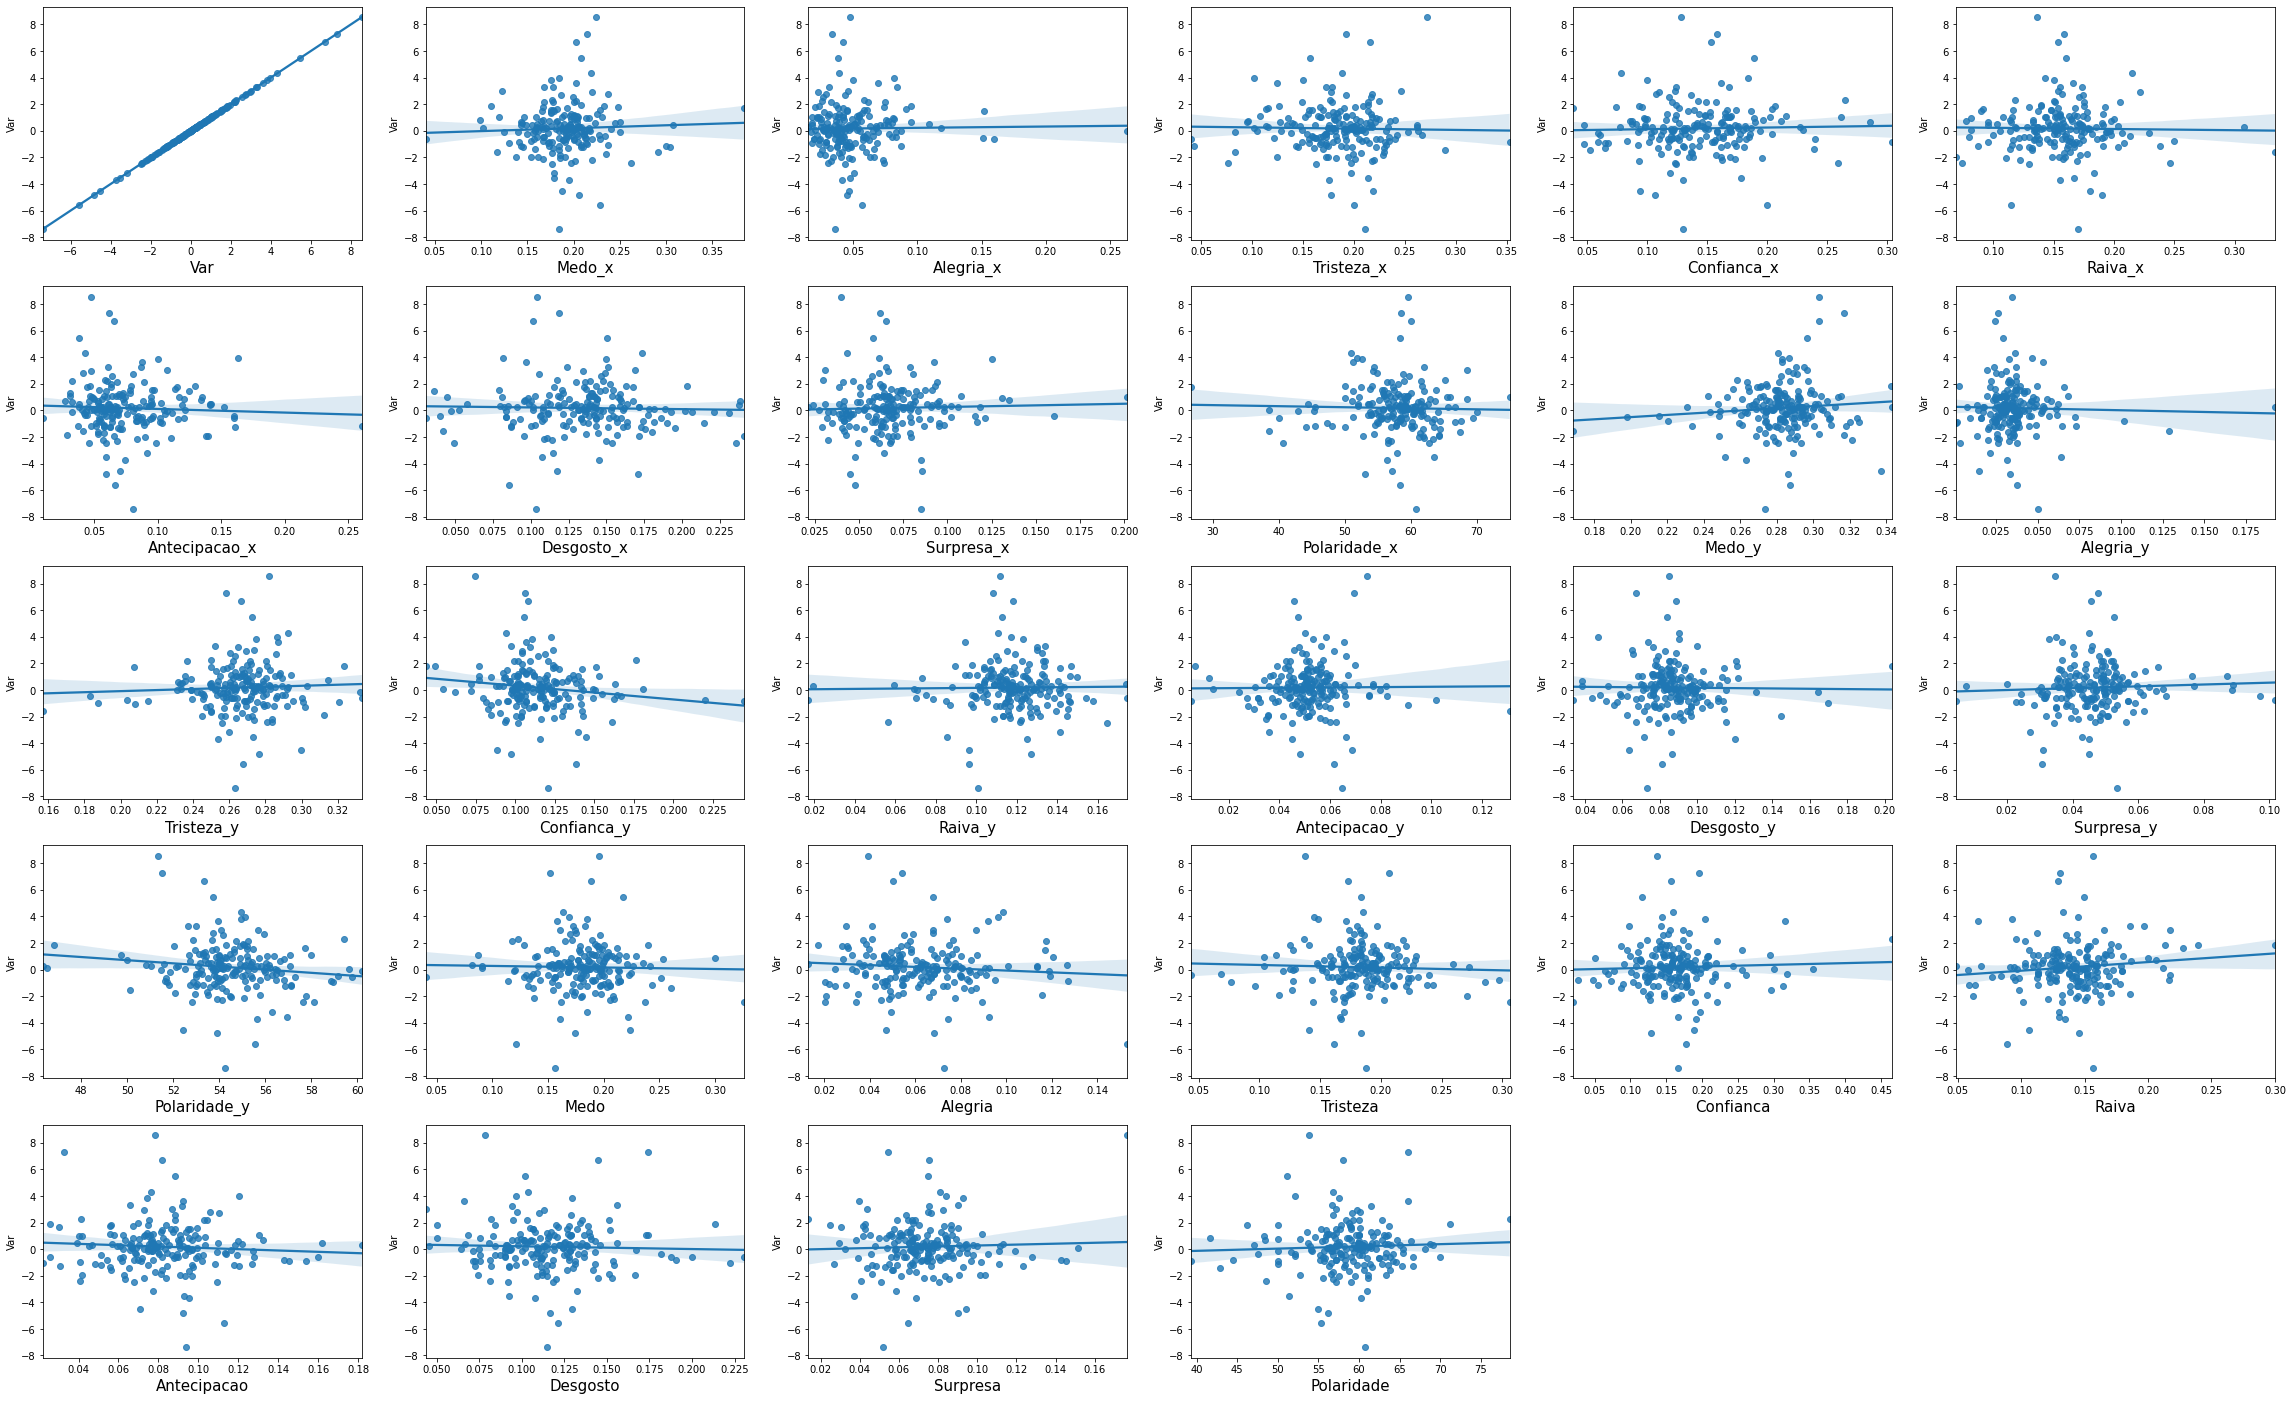

In [361]:
plt.figure(figsize=(40,30))
plotnumber=1

for column in predict:
    if plotnumber <= len(predict.columns):
        ax = plt.subplot(6,6,plotnumber)
        sns.regplot(x=predict[column], y=predict["Var"])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

## Modelagem

### Base treatement

In [422]:
#Separar as bases de treino
y = predict.loc[:,"Var"]
x = predict.drop(columns =["Var"])

In [423]:
#Cálculo dos VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculatevif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping ' + X.iloc[:, variables].columns[maxloc] +  'at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [429]:
VIF = calculatevif(x)

#Não usarei eliminação por VIF no modelo, pois ao final da backward elimnation
#não sobrará variáveis

dropping Medo_yat index: 9
dropping Medo_xat index: 0
dropping Polaridade_yat index: 15
dropping Polaridade_xat index: 7
dropping Polaridadeat index: 22
dropping Tristeza_yat index: 8
dropping Tristeza_xat index: 1
dropping Tristezaat index: 14
dropping Raiva_yat index: 8
dropping Medoat index: 11
dropping Raiva_xat index: 2
dropping Desgosto_yat index: 8
dropping Confianca_yat index: 6
dropping Antecipacao_yat index: 6
dropping Raivaat index: 9
dropping Surpresa_yat index: 6
dropping Antecipacaoat index: 8
dropping Desgostoat index: 8
dropping Surpresaat index: 8
dropping Confianca_xat index: 1
dropping Confiancaat index: 6
dropping Antecipacao_xat index: 1
dropping Alegriaat index: 4
dropping Surpresa_xat index: 2
Remaining variables:
Index(['Alegria_x', 'Desgosto_x', 'Alegria_y'], dtype='object')


In [426]:
#Modelo prossegue com a database inicial
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [430]:
import statsmodels.api as sm
model = sm.OLS(y_train,sm.add_constant(x_train)).fit()

In [431]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Var   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.111
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.340
Time:                        15:04:46   Log-Likelihood:                -278.13
No. Observations:                 143   AIC:                             612.3
Df Residuals:                     115   BIC:                             695.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.28e+08    5.6e+07      2.283      0.024    1.69e+07    2.39e+08
Medo_x         1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Alegria_x      1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Tristeza_x     1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Confianca_x    1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Raiva_x        1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Antecipacao_x  1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Desgosto_x     1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Surpresa_x     1.064e+07   3.12e+07      0.340      0.734   -5.13e+07    7.25e+07
Polaridade_x      0.0634      0.300      0.211      0.833      -0.531       0.658
Medo_y        -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Alegria_y     -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Tristeza_y    -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Confianca_y   -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Raiva_y       -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Antecipacao_y -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Desgosto_y    -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Surpresa_y    -7.828e+07   2.97e+07     -2.638      0.009   -1.37e+08   -1.95e+07
Polaridade_y      0.0372      1.188      0.031      0.975      -2.317       2.391
Medo          -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Alegria       -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Tristeza      -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Confianca     -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Raiva         -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Antecipacao   -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Desgosto      -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Surpresa      -6.031e+07   3.26e+07     -1.852      0.067   -1.25e+08    4.19e+06
Polaridade       -0.4128      0.262     -1.578      0.117      -0.931       0.105
==============================================================================
Omnibus:                       14.012   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.154
Skew:                           0.315   Prob(JB):                     6.32e-08
Kurtosis:                       5.273   Cond. No.                     6.75e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

In [433]:
# Removendo as colunas que possuem P-value > 0.05
# Backward Elimination
cols = list(x_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Medo_y', 'Alegria_y', 'Tristeza_y', 'Confianca_y', 'Raiva_y', 'Antecipacao_y', 'Desgosto_y', 'Surpresa_y', 'Medo', 'Alegria', 'Tristeza', 'Confianca', 'Raiva', 'Antecipacao', 'Desgosto', 'Surpresa']


In [434]:
model = sm.OLS(y_train, sm.add_constant(x_train[selected_features_BE])).fit()

In [435]:
p= pd.Series(model.pvalues.values[1:])
pmax = max(p)
pmax

0.04073046435396941

### Breush-Pagan Test - test for heteroscedasticity

- The null hypothesis for this test is that the error variances are all equal.
- The alternate hypothesis is that the error variances are not equal. More specifically, as Y increases, the variances increase (or decrease).

In [371]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)


[('Lagrange multiplier statistic', 24.405331459118322),
 ('p-value', 0.08101783939842845),
 ('f-value', 1.620578628071335),
 ('f p-value', 0.07245012251935547)]

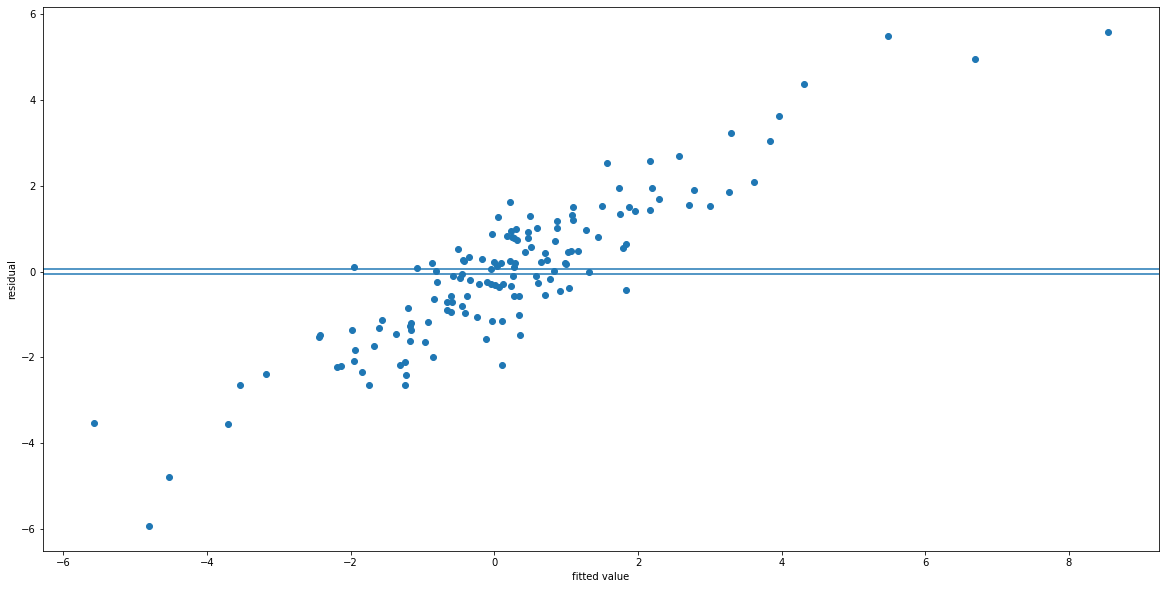

[('Lagrange multiplier statistic', 24.405331459118322),
 ('p-value', 0.08101783939842845),
 ('f-value', 1.620578628071335),
 ('f p-value', 0.07245012251935547)]

In [372]:
plt.figure(figsize = (20,10))
plt.scatter(y_train,model.resid.values)
plt.axhline(0.05)
plt.axhline(-0.05)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.show()
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)


### Shapiro Wilk: testing for normality

((array([-2.58737924, -2.2656706 , -2.08113048, -1.94835608, -1.84304269,
         -1.75491888, -1.678633  , -1.61102627, -1.5500713 , -1.49438581,
         -1.44298316, -1.39513338, -1.35028049, -1.30799079, -1.26791911,
         -1.22978601, -1.19336194, -1.15845585, -1.12490695, -1.09257858,
         -1.06135351, -1.03113038, -1.00182092, -0.97334775, -0.94564261,
         -0.91864496, -0.89230082, -0.86656185, -0.84138457, -0.81672966,
         -0.79256151, -0.76884767, -0.74555851, -0.72266689, -0.70014786,
         -0.67797842, -0.65613731, -0.63460482, -0.61336263, -0.59239368,
         -0.57168204, -0.55121279, -0.53097195, -0.51094635, -0.4911236 ,
         -0.47149199, -0.45204045, -0.43275847, -0.41363607, -0.39466375,
         -0.37583244, -0.35713349, -0.33855859, -0.32009979, -0.30174942,
         -0.28350011, -0.26534474, -0.24727641, -0.22928847, -0.21137441,
         -0.19352793, -0.17574289, -0.15801327, -0.14033318, -0.12269685,
         -0.10509861, -0.08753286, -0.

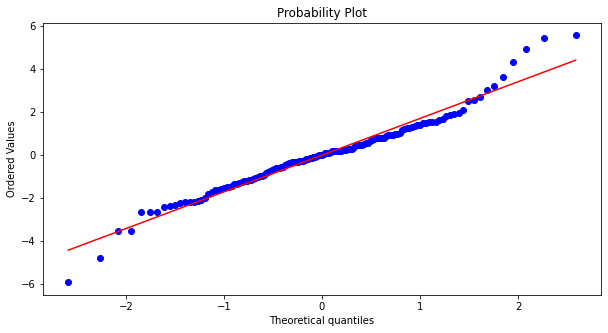

In [373]:
#testing normtility
import scipy as sp

fig, ax = plt.subplots(figsize=(10,5))
sp.stats.probplot(model.resid.values, plot=ax, fit=True)

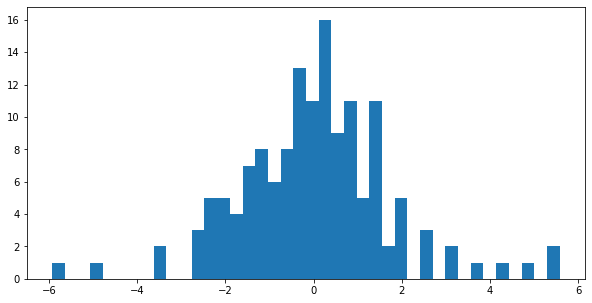

In [374]:
plt.figure(figsize = (10,5))
plt.hist(model.resid.values,bins=40)
plt.show()

In [375]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(model.resid.values)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Os erros estão distrubuídos normalmente')
else:
	print('Rejeitamos H0. Não podemos afirmar que os erros estão distrubuídos normalmente')

Statistics=0.968, p=0.002
Rejeitamos H0. Não podemos afirmar que os erros estão distrubuídos normalmente


### Dupim-Watson test

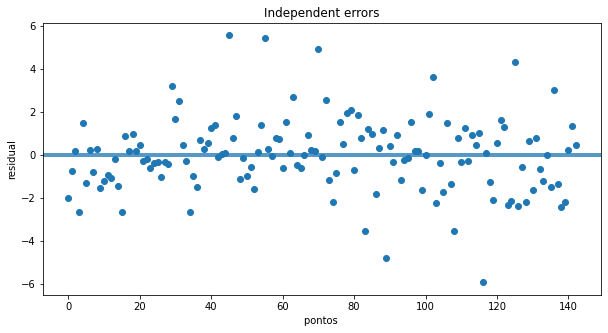

In [376]:
#erros independentes?(Dublin-Wapson)
plt.figure(figsize = (10,5))
plt.scatter([x for x in range(model.resid.values.shape[0])],model.resid.values)
plt.axhline(0.05)
plt.axhline(-0.05)
plt.xlabel('pontos ')
plt.ylabel('residual')
plt.title("Independent errors")
plt.show()


In [377]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid.values)

2.0100876548190683

In [378]:
pip install dwtest

In [379]:
#from statsmodels.stats.stattools import durbin_watson
#durbin_watson(model.resid.values)
#The null hypothesis of the test is that there is no serial correlation in the residuals

#The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, 
#the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. 
#The closer to 4, the more evidence for negative serial correlation.

#https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid.values)

2.0100876548190683

### Validating Model

In [380]:
#VALIDATING THE MODEL
# Aplicando o modelo na nova base de dados
model = sm.OLS(y_train, x_train[selected_features_BE]).fit()

# Fazendo o prediçao
predictions = model.predict(x_test[selected_features_BE])

In [381]:
pd.set_option('display.max_rows', 10)
predictions

705    0.516130
646   -1.046023
758   -0.392532
692    0.257805
720    0.616001
         ...   
712   -0.951482
771    0.810028
706    0.346957
475    0.503680
482    1.132431
Length: 48, dtype: float64

In [382]:
y_test

705    1.071528
646   -1.409969
758    0.012845
692    0.005958
720    2.942560
         ...   
712   -0.633792
771    0.471567
706   -2.042026
475   -0.561395
482   -1.273386
Name: Var, Length: 48, dtype: float64

In [383]:
# Criando um DataFrame com o preço e suas prediçoes

df = pd.DataFrame({'Actual Variation':y_test, 'Predicted':predictions})
df["Data"] = predict_nodate["Data"]
df.sort_values(by=["Data"])


,Actual Variation,Predicted,Data
444,-7.377361,0.315596,2020-03-23
445,7.292707,0.071699,2020-03-24
447,1.545963,0.404118,2020-03-26
448,-1.084062,0.137488,2020-03-27
461,1.286160,0.017388,2020-04-16
...,...,...,...
767,-0.916558,0.178733,2021-07-15
771,0.471567,0.810028,2021-07-21
773,-0.676884,0.110223,2021-07-23
777,-0.593729,0.632779,2021-07-29


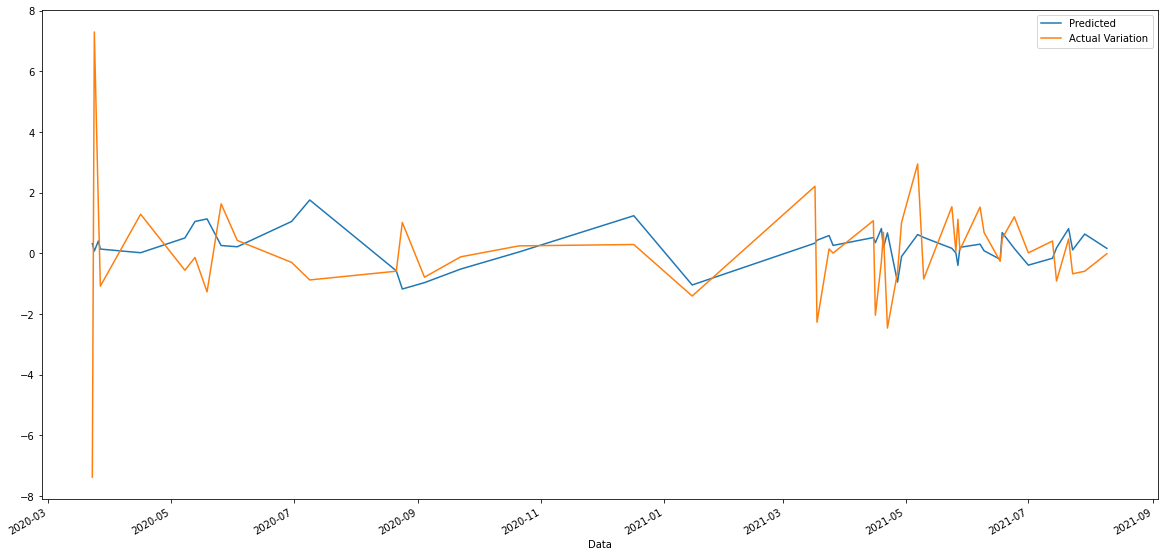

In [384]:
df.plot(x="Data",y=["Predicted","Actual Variation"],kind="line", figsize=(20,10))

In [385]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Actual Variation'],predictions)

In [386]:
print ("r-squared:", r_value**2)

r-squared: 0.003648325046226807
